# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Outlier-removal:" data-toc-modified-id="Outlier-removal:-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Outlier removal:</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-36"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Discuss your findings</a></div>

**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [1]:
__author__ = 'Linda Jaber, CUSP NYU 2018'
from __future__ import print_function

import sys
import os
try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib
    
import pandas as pd

import matplotlib.pyplot as plot

import statsmodels.api as sm
import statsmodels.formula.api as smf


%pylab inline

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'


Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plot']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
PUIdata = os.getenv('PUIDATA')
if PUIdata is None:
    os.environ['PUIDATA']='%s/PUIdata'%os.getenv('HOME')
    PUIdata = os.getenv('PUIDATA')
print('PUIdata: ', PUIdata) 

PUIdata:  /nfshome/lj1232/PUIdata


### Downloading Data // Uncomment to run code

In [3]:
# firearms murders and ownership data

#!wget https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW9_fb55/World%20firearms%20murders%20and%20ownership%20-%20Sheet%201.csv
#%mkdir $PUIDATA/HW_9
#!mv 'World firearms murders and ownership - Sheet 1.csv' $PUIDATA/HW_9

In [4]:
# Number of mass shootings data

#url = 'data:application/octet-stream;charset=utf-8,Country%2CGuns%20per%20100%20inhabitants%2CNumber%20of%20mass%20shootings%20(1983-2013)%0AAustralia%2C15%2C4%0AAustria%2C30.4%2C1%0ABelgium%2C17.2%2C2%0ACanada%2C30.8%2C4%0ADenmark%2C12%2C0%0AFinland%2C45.3%2C2%0AFrance%2C31.2%2C6%0AGermany%2C30.3%2C7%0AGreece%2C22.5%2C0%0AHolland%2C3.9%2C2%0AHungary%2C5.5%2C0%0AIceland%2C30.3%2C0%0AIreland%2C8.6%2C0%0AItaly%2C11.9%2C0%0AJapan%2C0.6%2C0%0ALuxembourg%2C15.3%2C0%0ANew%20Zealand%2C22.6%2C3%0ANorway%2C31.3%2C1%0APoland%2C1.3%2C0%0APortugal%2C8.5%2C1%0ASpain%2C10.4%2C1%0ASweden%2C31.6%2C2%0ASwitzerland%2C45.7%2C2%0AUnited%20Kingdom%2C6.2%2C3%0AUnited%20States%2C88.8%2C78'
#urllib.urlretrieve(url, 'data-pvLFI.csv')
#!mv data-pvLFI.csv $PUIDATA/HW_9

In [5]:
# the world population by country data

#url = 'http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv'
#urllib.urlretrieve(url, 'file.gz')
#!unzip file.gz -d $PUIDATA/HW_9
#!mv file.gz $PUIDATA/HW_9

In [6]:
# the world gdp by country

#url = 'http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv'
#urllib.urlretrieve(url, 'file2.gz')
#!unzip file2.gz -d $PUIDATA/HW_9
#!mv file2.gz $PUIDATA/HW_9
!ls -ltr $PUIDATA/HW_9

total 704
-rw-rw---- 1 lj1232 lj1232    731 Oct 25 23:51 Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv
-rw-rw---- 1 lj1232 lj1232  39350 Oct 25 23:51 Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv
-rw-rw---- 1 lj1232 lj1232    838 Oct 26 00:07 Metadata_Indicator_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv
-rw-rw---- 1 lj1232 lj1232  39350 Oct 26 00:07 Metadata_Country_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv
-rw-rw---- 1 lj1232 lj1232 243490 Oct 26 00:07 API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv
-rw-rw---- 1 lj1232 lj1232    449 Nov 13 01:03 data-pvLFI.csv
-rw-rw---- 1 lj1232 lj1232  79717 Nov 13 01:04 file.gz
-rw-rw---- 1 lj1232 lj1232   7667 Nov 13 07:24 World firearms murders and ownership - Sheet 1.csv
-rw-rw---- 1 lj1232 lj1232 171866 Nov 13 07:25 API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv
-rw-rw---- 1 lj1232 lj1232 116071 Nov 13 09:05 file2.gz


## Reading Data

In [7]:
df_ = pd.read_csv(PUIdata + '/HW_9/World firearms murders and ownership - Sheet 1.csv',\
                  usecols=['Country/Territory', 'Average total all civilian firearms', 'Number of homicides by firearm'])
df_.columns = ['Country Name', 'Number of homicides by firearm', 'Average total all civilian firearms',]
df_.head()

,Country Name,Number of homicides by firearm,Average total all civilian firearms
0,Albania,56.0,270000.0
1,Algeria,20.0,1900000.0
2,Angola,NaN,2800000.0
3,Anguilla,1.0,NaN
4,Argentina,1198.0,3950000.0


In [8]:
df_ms = pd.read_csv(PUIdata + '/HW_9/data-pvLFI.csv')
df_ms.columns = ['Country Name', 'Guns/100 inhabitants', 'Number of mass shootings']
df_ms.head()

,Country Name,Guns/100 inhabitants,Number of mass shootings
0,Australia,15.0,4
1,Austria,30.4,1
2,Belgium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [9]:
# took year 2012 as it is the year mentioned for the Guardian data
df_pop = pd.read_csv(PUIdata + '/HW_9/API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv', skiprows=[0], header=1, usecols=['Country Name', '2012'])
df_pop.columns = ['Country Name', 'pop']
df_pop.head()

,Country Name,pop
0,Aruba,102577.0
1,Afghanistan,30696958.0
2,Angola,25096150.0
3,Albania,2900401.0
4,Andorra,82431.0


In [10]:
df_gdp = pd.read_csv(PUIdata + '/HW_9/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv', skiprows=[0], header=1, usecols=['Country Name', '2012'])
df_gdp.columns = ['Country Name', 'gdp']
df_gdp.head()

,Country Name,gdp
0,Aruba,NaN
1,Afghanistan,2.053654e+10
2,Angola,1.139232e+11
3,Albania,1.231978e+10
4,Andorra,3.164615e+09


In [11]:
df = df_pop.merge(df_gdp, on='Country Name').merge(df_, on='Country Name').merge(df_ms, on='Country Name')
df.head()

,Country Name,pop,gdp,Number of homicides by firearm,Average total all civilian firearms,Guns/100 inhabitants,Number of mass shootings
0,Australia,22742475.0,1.543411e+12,30.0,3050000.0,15.0,4
1,Austria,8429991.0,4.094252e+11,18.0,2500000.0,30.4,1
2,Belgium,11128246.0,4.978842e+11,70.0,1800000.0,17.2,2
3,Canada,34750545.0,1.824289e+12,173.0,9950000.0,30.8,4
4,Switzerland,7996861.0,6.680436e+11,57.0,3400000.0,45.7,2


# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


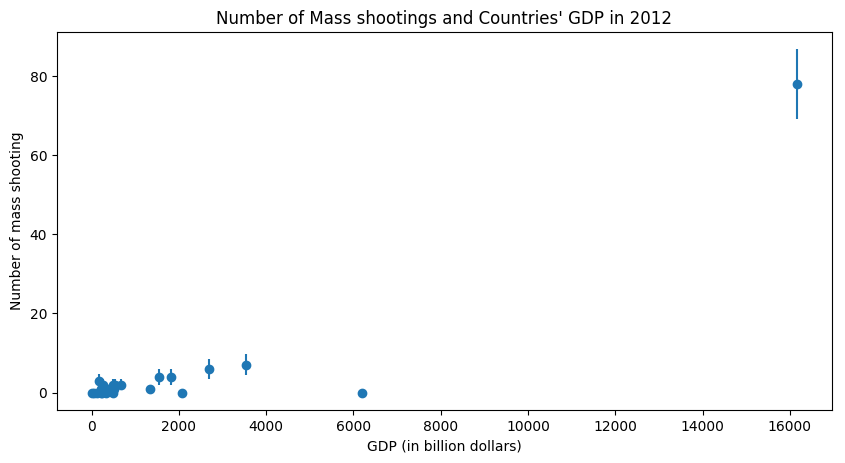

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has the highest GDP and the highest number of mass shootings


In [12]:
fig = plt.figure(figsize=(10,5), dpi=100) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df.gdp / 1e9, df['Number of mass shootings'])
ax.errorbar(df.gdp / 1e9, df['Number of mass shootings'], 
            yerr = np.sqrt(df['Number of mass shootings'] * 1.0), fmt = '.')

ax.set_xlabel("GDP (in billion dollars)")
ax.set_ylabel("Number of mass shooting")
ax.set_title("Number of Mass shootings and Countries' GDP in 2012")
ax.set_ylim()
plt.show()

print (color.BOLD + "Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has the highest GDP and the highest number of mass shootings")


In [13]:
type(df['gdp'][0])

numpy.float64

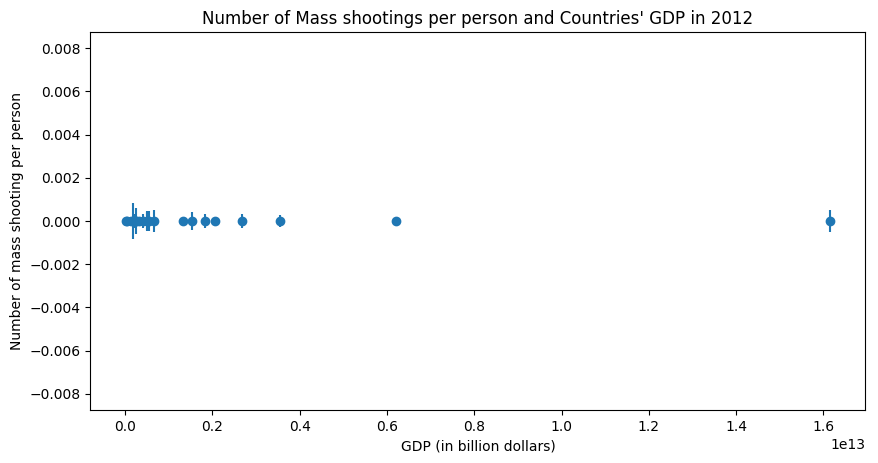

Number of mass shooting vs GDP per capita,errors represent Poisson statistics.
We notice that when plotting the number of mass shhoting per caapita the us is no longer an outlier


In [14]:
fig = plt.figure(figsize=(10,5), dpi=100) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df['gdp'], df['Number of mass shootings'] / df['pop'])
ax.errorbar(df['gdp'], df['Number of mass shootings']/df['pop'], yerr=np.sqrt(df['Number of mass shootings']/df['pop']), fmt='.')

ax.set_xlabel("GDP (in billion dollars)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_title("Number of Mass shootings per person and Countries' GDP in 2012")

ax.set_ylim()
plt.show()

print (color.BOLD + 'Number of mass shooting vs GDP per capita,\
errors represent Poisson statistics.\n\
We notice that when plotting the number of mass shhoting per caapita the us is no longer an outlier')


## plot the average number of civilian fire arms per 1000 people
first without errors, then with errors. are there  points that look like outliers?

In [15]:
df['average number of civilian fire arms/1000 people'] = df['Average total all civilian firearms'] / df['pop'] * 1000
df.head()

,Country Name,pop,gdp,Number of homicides by firearm,Average total all civilian firearms,Guns/100 inhabitants,Number of mass shootings,average number of civilian fire arms/1000 people
0,Australia,22742475.0,1.543411e+12,30.0,3050000.0,15.0,4,134.110294
1,Austria,8429991.0,4.094252e+11,18.0,2500000.0,30.4,1,296.560222
2,Belgium,11128246.0,4.978842e+11,70.0,1800000.0,17.2,2,161.750558
3,Canada,34750545.0,1.824289e+12,173.0,9950000.0,30.8,4,286.326445
4,Switzerland,7996861.0,6.680436e+11,57.0,3400000.0,45.7,2,425.166825


In [16]:
df.tail()

,Country Name,pop,gdp,Number of homicides by firearm,Average total all civilian firearms,Guns/100 inhabitants,Number of mass shootings,average number of civilian fire arms/1000 people
18,New Zealand,4408100.0,1.761929e+11,7.0,925000.0,22.6,3,209.840975
19,Poland,38063164.0,5.003608e+11,35.0,510000.0,1.3,0,13.398781
20,Portugal,10514844.0,2.163682e+11,44.0,900000.0,8.5,1,85.593281
21,Sweden,9519374.0,5.438806e+11,37.0,2800000.0,31.6,2,294.136988
22,United States,313993272.0,1.615526e+13,9146.0,270000000.0,88.8,78,859.891036


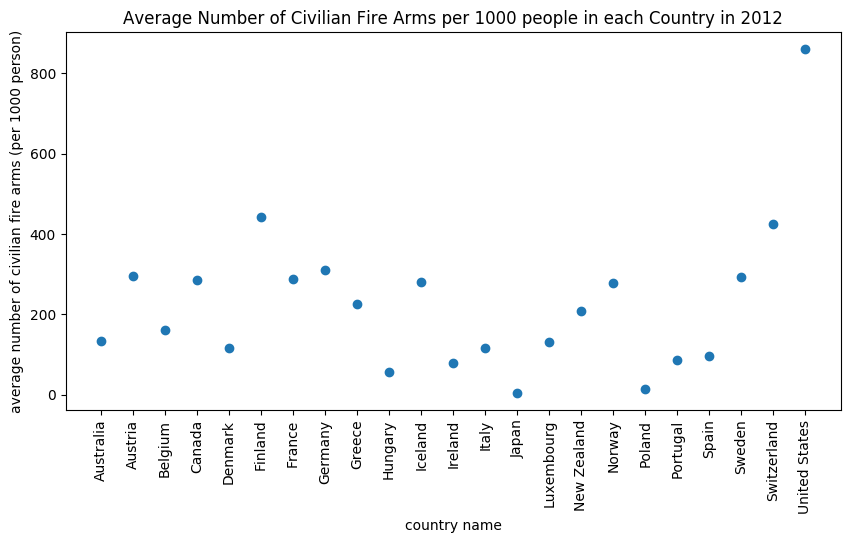

The average number of civilian fire arms per 1000 people plotted for each of the inspected countries.
Here again we can see how the United States represents an outlier with the highest average possesion of fire arms.
For every 1000 people in the United States almost 850 own a gun.


In [17]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)

ax.plot(df['Country Name'], df['average number of civilian fire arms/1000 people'], linestyle=' ', marker='o')

ax.set_xlabel('country name')
ax.set_ylabel('average number of civilian fire arms (per 1000 person)')
ax.set_title("Average Number of Civilian Fire Arms per 1000 people in each Country in 2012")
plt.xticks(rotation=90)
plt.show()

print(color.BOLD + 'The average number of civilian fire arms per 1000 people plotted for each of the inspected countries.\n\
Here again we can see how the United States represents an outlier with the highest average possesion of fire arms.\n\
For every 1000 people in the United States almost 850 own a gun.')

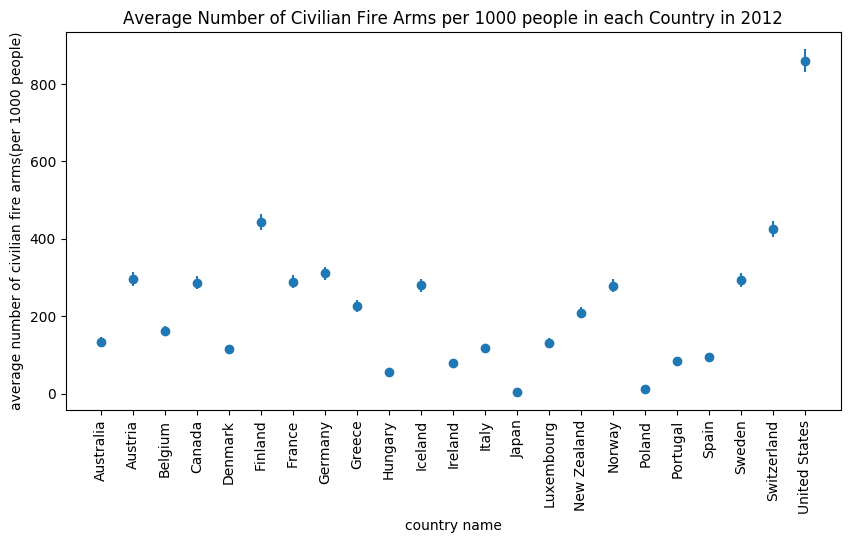

The average number of civilian fire arms per 1000 people plotted with errors for each of the inspected countries.
Here again we can see how the United States represents an outlier with the highest average possesion of fire arms.


In [18]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)

ax.errorbar(df['Country Name'], df['average number of civilian fire arms/1000 people'],\
        yerr=np.sqrt(df['average number of civilian fire arms/1000 people']), linestyle=' ', marker='o')

ax.set_xlabel('country name')
ax.set_ylabel('average number of civilian fire arms(per 1000 people)')
ax.set_title("Average Number of Civilian Fire Arms per 1000 people in each Country in 2012")
plt.xticks(rotation=90)
plt.show()

print(color.BOLD + 'The average number of civilian fire arms per 1000 people plotted with errors for each of the inspected countries.\n\
Here again we can see how the United States represents an outlier with the highest average possesion of fire arms.')

## plot the average number of homicide by fire arms per 1000 people
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

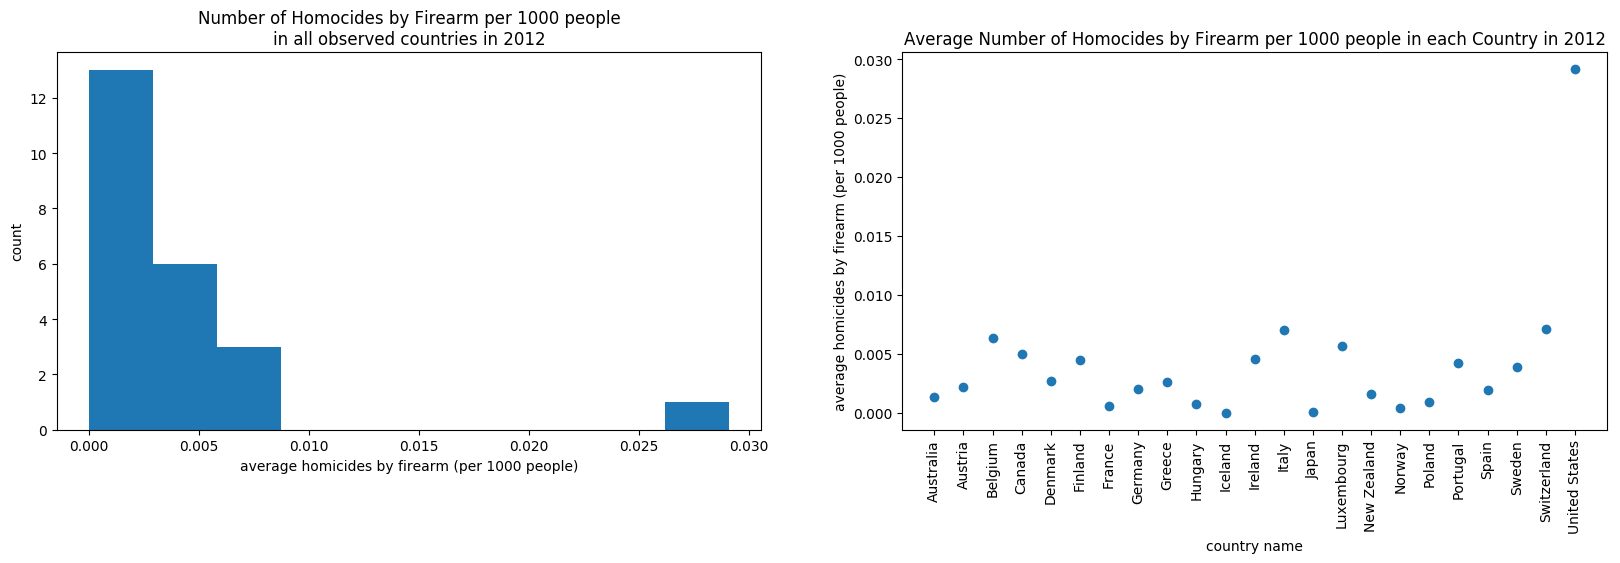

The two figures above are two representations of the same data.
The first graph is a histrogram of the total average number of homocides per 1000 people in all countries observed.
It is clear form the histogram that almost all of the countries show close values between 0 and 0.01 except one outlier that shows a value close to .03.
The second graph comes to calrify that the observed oulier is again the United States.


In [19]:
# histogram

fig, ax = plt.subplots(1, 2, figsize=(20,5), dpi=100)

ax[0].hist(df['Number of homicides by firearm'] / df['pop'] * 1000)
ax[0].set_xlabel('average homicides by firearm (per 1000 people)');
ax[0].set_ylabel('count')
ax[0].set_title('Number of Homocides by Firearm per 1000 people\nin all observed countries in 2012')

ax[1].plot(df['Country Name'], df['Number of homicides by firearm'] / df['pop'] * 1000, linestyle=' ', marker='o')
ax[1].set_xlabel('country name')
ax[1].set_ylabel('average homicides by firearm (per 1000 people)')
ax[1].set_title("Average Number of Homocides by Firearm per 1000 people in each Country in 2012")
plt.xticks(rotation=90)

plt.show()

print(color.BOLD + 'The two figures above are two representations of the same data.\n\
The first graph is a histrogram of the total average number of homocides per 1000 people in all countries observed.\n\
It is clear form the histogram that almost all of the countries show close values between 0 and 0.01 except one outlier \
that shows a value close to .03.\nThe second graph comes to calrify that the observed oulier is again the United States.')

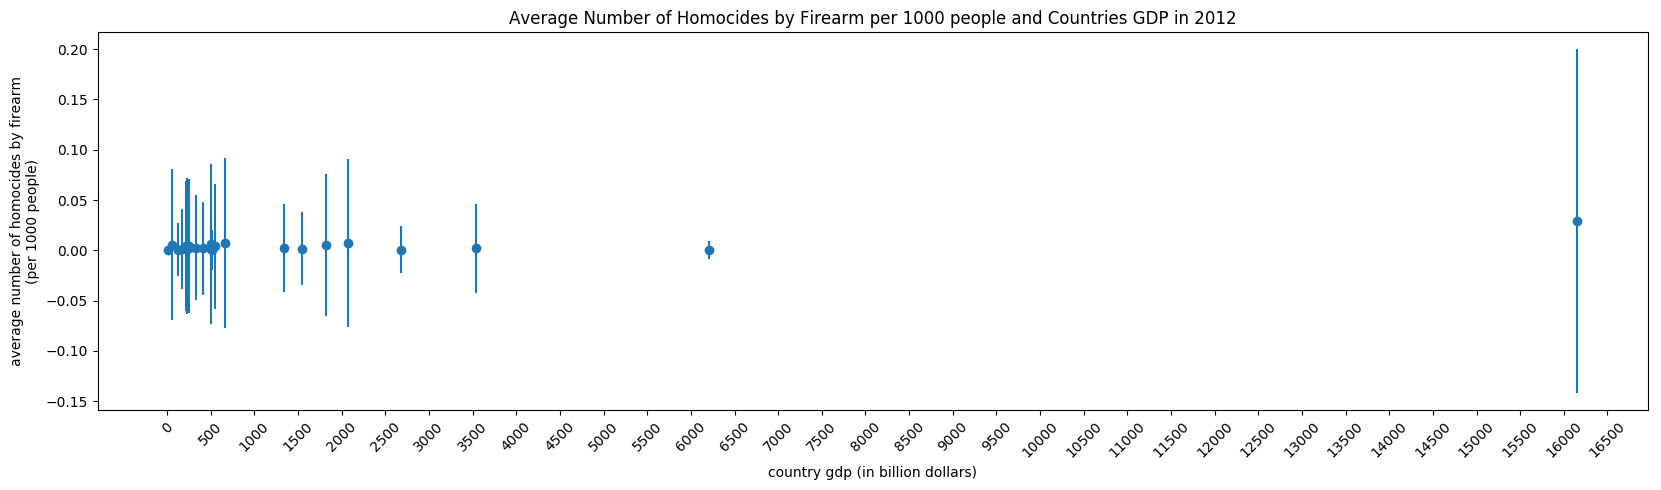

The plot represents the average number of homocides by firearm per 1000 people against each country's gdp, errors represent Poisson statistics.
The United States show the highest gdp and the highest number of homocides.


In [20]:
# against gdp with statistical errors

fig, ax = plt.subplots(figsize=(20,5), dpi=100)

ax.errorbar(df['gdp'] / 1e9, df['Number of homicides by firearm'] / df['pop'] * 1000,\
            yerr=np.sqrt(df['Number of homicides by firearm'] / df['pop'] * 1000), linestyle=' ', marker='o')

ax.set_xlabel('country gdp (in billion dollars)')
ax.set_ylabel('average number of homocides by firearm\n(per 1000 people)')
ax.set_title('Average Number of Homocides by Firearm per 1000 people and Countries GDP in 2012')
plt.xticks(range(0,17000,500), rotation=45)

plt.show()

print(color.BOLD + 'The plot represents the average number of homocides by firearm per 1000 people against each country\'s gdp, errors represent Poisson statistics.\n\
The United States show the highest gdp and the highest number of homocides.')

## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


In [21]:
df.tail(2)

,Country Name,pop,gdp,Number of homicides by firearm,Average total all civilian firearms,Guns/100 inhabitants,Number of mass shootings,average number of civilian fire arms/1000 people
21,Sweden,9519374.0,5.438806e+11,37.0,2800000.0,31.6,2,294.136988
22,United States,313993272.0,1.615526e+13,9146.0,270000000.0,88.8,78,859.891036


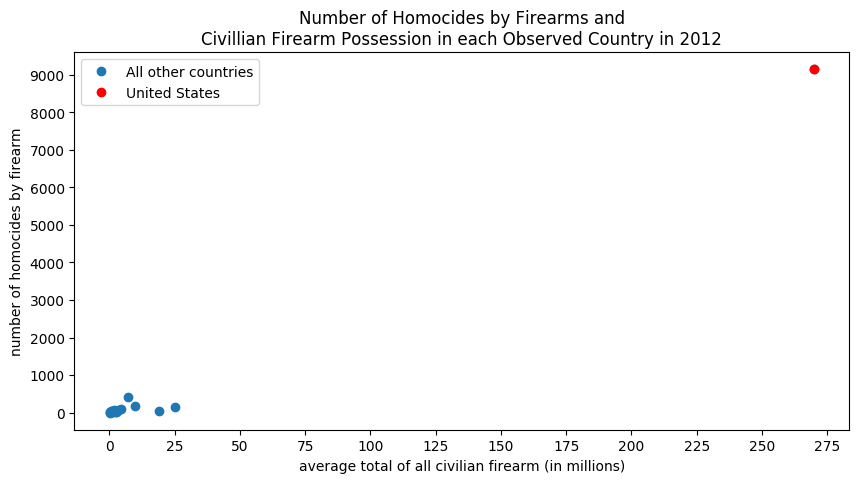

In [22]:
# without errorbars

figure, ax = plt.subplots(figsize=(10,5), dpi=100)

ax.plot(df['Average total all civilian firearms'] / 1e6, df['Number of homicides by firearm'], linestyle=' ', marker='o', label='All other countries')
ax.plot(df['Average total all civilian firearms'][22] / 1e6, df['Number of homicides by firearm'][22], linestyle=' ', marker='o', c='r', label='United States')

ax.set_xlabel('average total of all civilian firearm (in millions)')
ax.set_ylabel('number of homocides by firearm')
ax.set_xticks(range(0,300,25))
ax.set_yticks(range(0,10000,1000))
ax.set_title('Number of Homocides by Firearms and\nCivillian Firearm Possession in each Observed Country in 2012')
plt.legend()



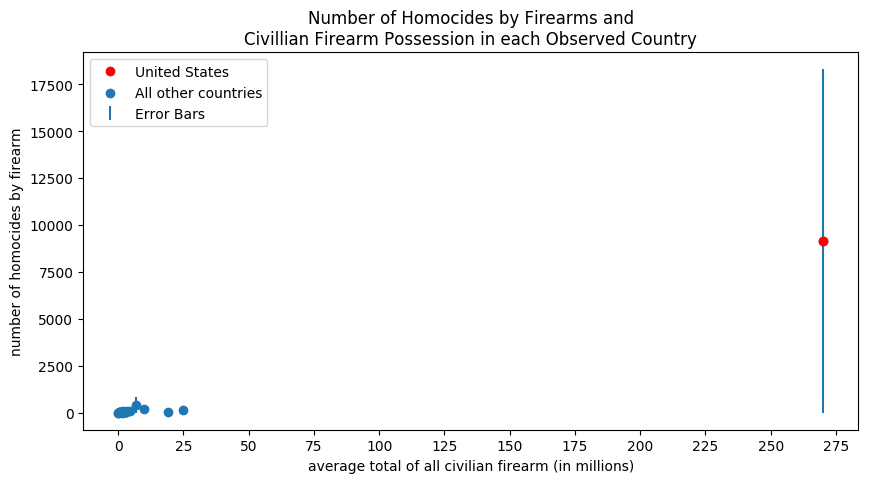

Both scatter plots above represent the number of homocides commited by firearmas a function of the average total of all civillian firearm in each of the countries observed.
The second plot shows error bars. The plots show striking numbers. While all the countries reside in a clustered zone and the very bottom of the plot, the United States shows an extremely high number of firearm possession close to 270 million firearms. The number is accompanied by a very high number of homocides close to 9000.


In [23]:
# with errorbars

figure, ax = plt.subplots(figsize=(10,5), dpi=100)

ax.scatter(df['Average total all civilian firearms'] / 1e6, df['Number of homicides by firearm'],\
           label='All other countries')
ax.plot(df['Average total all civilian firearms'][22] / 1e6, df['Number of homicides by firearm'][22], linestyle=' ', marker='o', c='r', label='United States')
ax.errorbar(df['Average total all civilian firearms'] / 1e6, df['Number of homicides by firearm'],\
            yerr=np.sqrt(df['Number of homicides by firearm'])**2, linestyle=' ', label='Error Bars')

ax.set_xlabel('average total of all civilian firearm (in millions)')
ax.set_ylabel('number of homocides by firearm')
ax.set_xticks(range(0,300,25))
ax.get_ylim()
ax.set_title('Number of Homocides by Firearms and\nCivillian Firearm Possession in each Observed Country')
plt.legend(loc=2)

plt.show()

print(color.BOLD + 'Both scatter plots above represent the number of homocides commited by firearm\
as a function of the average total of all civillian firearm in each of the countries observed.\n\
The second plot shows error bars. \
The plots show striking numbers. While all the countries reside in a clustered zone and the very bottom of the plot, \
the United States shows an extremely high number of firearm possession close to 270 million firearms. \
The number is accompanied by a very high number of homocides close to 9000.')

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


In [24]:
df.tail()

,Country Name,pop,gdp,Number of homicides by firearm,Average total all civilian firearms,Guns/100 inhabitants,Number of mass shootings,average number of civilian fire arms/1000 people
18,New Zealand,4408100.0,1.761929e+11,7.0,925000.0,22.6,3,209.840975
19,Poland,38063164.0,5.003608e+11,35.0,510000.0,1.3,0,13.398781
20,Portugal,10514844.0,2.163682e+11,44.0,900000.0,8.5,1,85.593281
21,Sweden,9519374.0,5.438806e+11,37.0,2800000.0,31.6,2,294.136988
22,United States,313993272.0,1.615526e+13,9146.0,270000000.0,88.8,78,859.891036


In [25]:
df['shootingsp1000p'] = df["Number of mass shootings"] / df['pop'] * 1e3

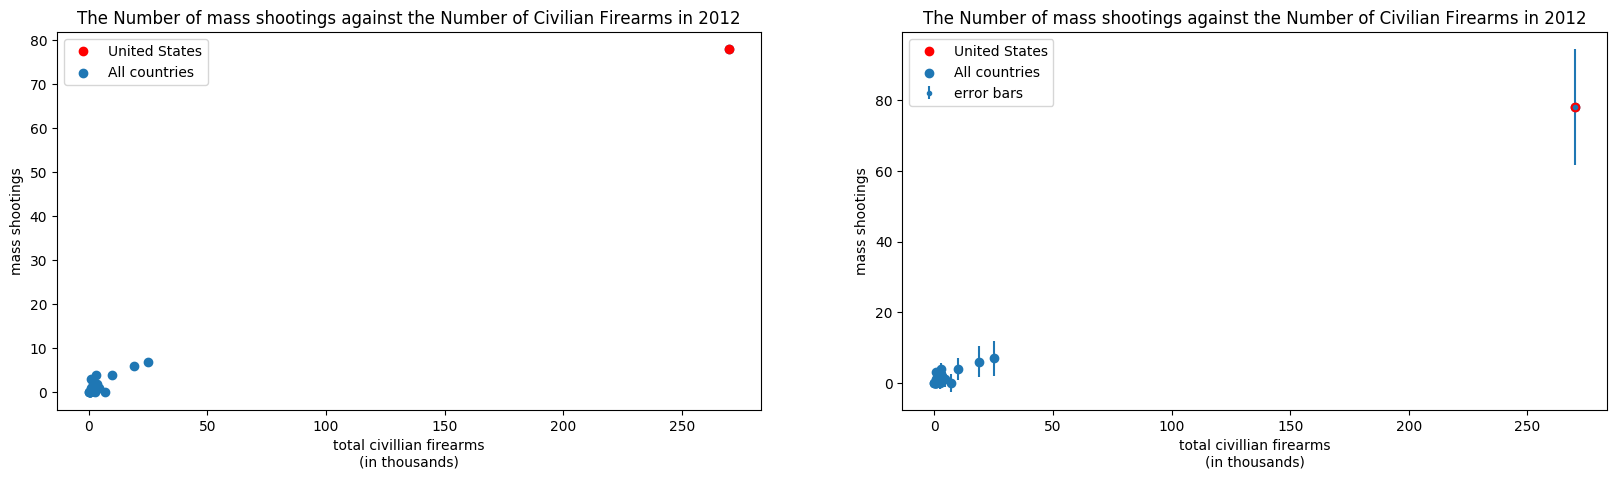

The two plots are for the number of mass shooting against the total number of civillian firearms in 2012.
The second figure is plottes with error bars. The United States is shown as an outlier here as well.
The US has a total number of cvillian firearms equal to 270 thousands with a 78 cases of mass shootings.
The rest of the countries show a very low values for the studied variables if compared to the US


In [26]:
# without error

fig, ax = plt.subplots(1, 2, figsize=(20,5), dpi=100)

ax[0].scatter(df['Average total all civilian firearms'] / 1e6, df['Number of mass shootings'], label='All countries')
ax[0].plot(df['Average total all civilian firearms'][22] / 1e6, df['Number of mass shootings'][22], linestyle=' ', marker='o', c='r', label='United States')

ax[0].set_ylabel('mass shootings')
ax[0].set_xlabel('total civillian firearms\n(in thousands)')
ax[0].set_title('The Number of mass shootings against the Number of Civilian Firearms in 2012')
ax[0].legend(loc=2)

ax[1].scatter(df['Average total all civilian firearms'] / 1e6, df['Number of mass shootings'], label='All countries')
ax[1].plot(df['Average total all civilian firearms'][22] / 1e6, df['Number of mass shootings'][22], linestyle=' ', marker='o', c='r', label='United States')
ax[1].errorbar(df['Average total all civilian firearms'] / 1e6, df['Number of mass shootings'], label='error bars',\
              yerr=np.sqrt(df['Average total all civilian firearms'] / 1e6), fmt='.')

ax[1].set_ylabel('mass shootings')
ax[1].set_xlabel('total civillian firearms\n(in thousands)')
ax[1].set_title('The Number of mass shootings against the Number of Civilian Firearms in 2012')
ax[1].get_ylim()
plt.legend(loc=2)

plt.show()
print(color.BOLD + 'The two plots are for the number of mass shooting against the total number of civillian firearms in 2012.\n\
The second figure is plottes with error bars. The United States is shown as an outlier here as well.\n\
The US has a total number of cvillian firearms equal to 270 thousands with a 78 cases of mass shootings.\n\
The rest of the countries show a very low values for the studied variables if compared to the US')

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that:  
    a - sqrt(0) = 0  
    b - 1/0 = infinity  
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.  


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




## Outlier removal:
The concept of outlier is actually rather sophisticated: a point can be an outlier in a context but not in another. If you want to remove outliers and try different fits, here is some info on how to remove data efficiently from a dataset 
    https://gist.github.com/fedhere/89db40a3c9a28335bf5a35d52a52c595

In [27]:
# it is obvious that the us is an outlier from the previous plots
# so I will remove it fromt the data
df.drop(df.index[22], inplace=True)

In [28]:
df.tail()

,Country Name,pop,gdp,Number of homicides by firearm,Average total all civilian firearms,Guns/100 inhabitants,Number of mass shootings,average number of civilian fire arms/1000 people,shootingsp1000p
17,Norway,5018573.0,5.102291e+11,2.0,1400000.0,31.3,1,278.963761,0.000199
18,New Zealand,4408100.0,1.761929e+11,7.0,925000.0,22.6,3,209.840975,0.000681
19,Poland,38063164.0,5.003608e+11,35.0,510000.0,1.3,0,13.398781,0.000000
20,Portugal,10514844.0,2.163682e+11,44.0,900000.0,8.5,1,85.593281,0.000095
21,Sweden,9519374.0,5.438806e+11,37.0,2800000.0,31.6,2,294.136988,0.000210


In [29]:
# mass shootings per person
df['masspp'] = df['Number of mass shootings'] / df['pop']
df['masspp'].head()

0    1.758824e-07
1    1.186241e-07
2    1.797228e-07
3    1.151061e-07
4    2.500981e-07
Name: masspp, dtype: float64

In [30]:
# average total of all civillian firearms per person
df['fapp'] = df['Average total all civilian firearms'] / df['pop']
df['fapp'].head()

0    0.134110
1    0.296560
2    0.161751
3    0.286326
4    0.425167
Name: fapp, dtype: float64

In [31]:
# getting the order of the mean of the sample
df['masspp'].mean()

1.1789415752626472e-07

In [32]:
# dividing by the order of magnitude to insure unity
df['masspp'] = df['masspp'] * 1e7
df['masspp'].head()

0    1.758824
1    1.186241
2    1.797228
3    1.151061
4    2.500981
Name: masspp, dtype: float64

In [33]:
# OLS

x = df['fapp']
X = sm.add_constant(df['fapp'])
y = df['masspp']

sm_ols = smf.OLS(y, X).fit()
sm_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 masspp   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     5.920
Date:                Tue, 13 Nov 2018   Prob (F-statistic):             0.0245
Time:                        23:38:14   Log-Likelihood:                -38.568
No. Observations:                  22   AIC:                             81.14
Df Residuals:                      20   BIC:                             83.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0534      0.595     -0.090      0.929        -1.295     1.188
fapp           6.2489      2.568      2.433      0.024         0.891    11.606
==============================================================================
Omnibus:                       35.142   Durbin-Watson:                   1.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.426
Skew:                           2.713   Prob(JB):                     5.16e-21
Kurtosis:                      11.514   Cond. No.                         8.55
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
# WLS

# errors show zero numbers. knowing that we cannot divide by 0 
# I took the minimum error above zero and assigned it instead of zeros 


min_error = np.sqrt(df['masspp'])[np.sqrt(df['masspp']) > 0].min()
df['mass_error'] = np.sqrt(df['masspp'])
df['mass_error'].replace(0, min_error, inplace=True)
df['mass_error']

0     1.326206
1     1.089147
2     1.340607
3     1.072875
4     1.581449
5     0.932935
6     0.462383
7     0.462383
8     1.922016
9     0.955930
10    0.462383
11    0.462383
12    0.462383
13    0.462383
14    0.462383
15    0.462383
16    0.462383
17    1.411594
18    2.608765
19    0.462383
20    0.975211
21    1.449475
Name: mass_error, dtype: float64

In [35]:
sm_wls = smf.WLS(y, X, weights=list(1/df['mass_error'])).fit()
sm_wls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                 masspp   R-squared:                       0.270
Model:                            WLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     7.403
Date:                Tue, 13 Nov 2018   Prob (F-statistic):             0.0132
Time:                        23:38:14   Log-Likelihood:                -30.755
No. Observations:                  22   AIC:                             65.51
Df Residuals:                      20   BIC:                             67.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.2317      0.352     -0.657      0.518        -0.967     0.504
fapp           4.9716      1.827      2.721      0.013         1.160     8.783
==============================================================================
Omnibus:                       14.271   Durbin-Watson:                   1.564
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.656
Skew:                           1.283   Prob(JB):                     0.000398
Kurtosis:                       6.239   Cond. No.                         9.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


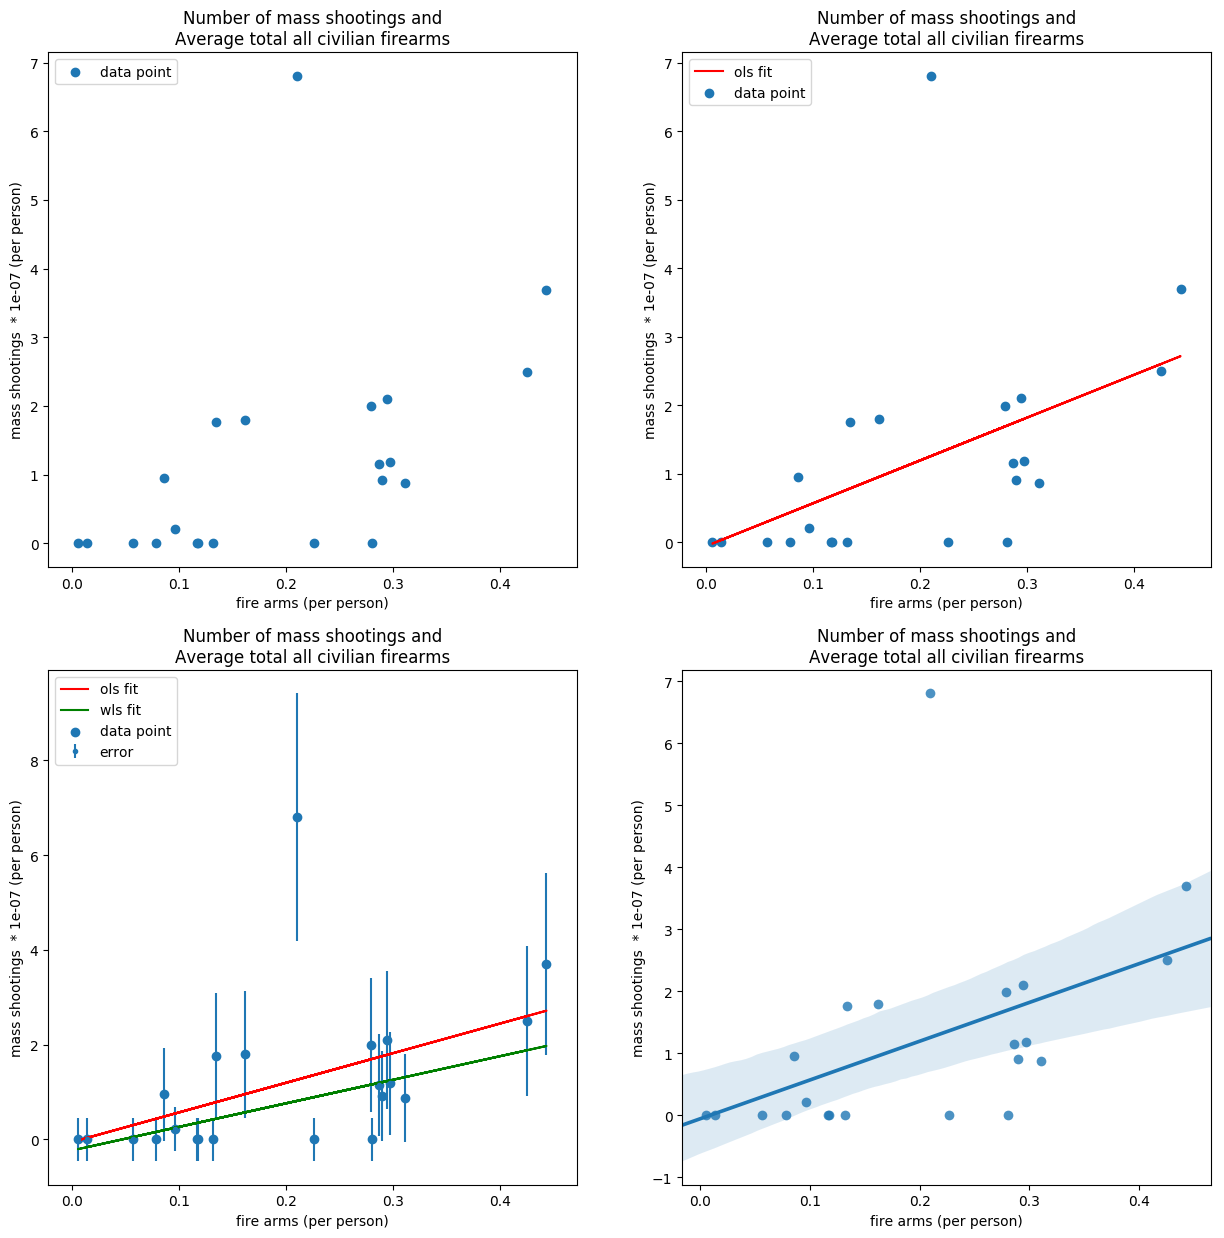

In [36]:
fig, ax = plt.subplots(2, 2, figsize=(15,15), dpi=100)

ax[0,0].scatter(df['fapp'], df['masspp'], label='data point')
ax[0,0].set_xlabel('fire arms (per person)')
ax[0,0].set_ylabel('mass shootings  * {} (per person)'.format(10**-7))
ax[0,0].set_title('Number of mass shootings and\nAverage total all civilian firearms')
ax[0,0].legend(loc=2)

ax[0,1].scatter(df['fapp'], df['masspp'], label='data point')
ax[0,1].plot(x, sm_ols.fittedvalues, 'r', label='ols fit')
ax[0,1].set_xlabel('fire arms (per person)')
ax[0,1].set_ylabel('mass shootings  * {} (per person)'.format(10**-7))
ax[0,1].set_title('Number of mass shootings and\nAverage total all civilian firearms')
ax[0,1].legend(loc=2)

ax[1,0].scatter(df['fapp'], df['masspp'], label='data point')
ax[1,0].errorbar(df['fapp'], df['masspp'], yerr=df['mass_error'], fmt='.', label='error')
ax[1,0].plot(x, sm_ols.fittedvalues, 'r', label='ols fit')
ax[1,0].plot(x, sm_wls.fittedvalues, 'g', label='wls fit')
ax[1,0].set_xlabel('fire arms (per person)')
ax[1,0].set_ylabel('mass shootings  * {} (per person)'.format(10**-7))
ax[1,0].set_title('Number of mass shootings and\nAverage total all civilian firearms')
ax[1,0].legend(loc=2)


import seaborn as sns  # i imported see born here at the end cause i don't want it to ruin my plots!

ax[1,1].sns_reg = sns.regplot(x, y, data=df)
ax[1,1].set_xlabel('fire arms (per person)')
ax[1,1].set_ylabel('mass shootings  * {} (per person)'.format(10**-7))
ax[1,1].set_title('Number of mass shootings and\nAverage total all civilian firearms')
ax[1,1].legend(loc=2)

**The plots above show the number of mass shootings per person in the observed countries plotted againt fire arm possession per person in 2012. Outliers were removed before starting the regression. From the exploratory analysis doen before it was clear that the US is an outlier so it was dropped. Then the data point were fitted using different models. We can observe a slightly different linear fits resulting from each model. The models show a positive linear relation, however the regression results show a low value of r-squared.**